In [63]:
# Import necessary libralies
import pickle
import numpy as np
import os
import mne
import pandas as pd
import matplotlib.pyplot as plt
pickle.format_version

'4.0'

## 1.ETL

In [64]:
# # Rename all the files to exp with number 
# main_path = os.getcwd()
# main_path
# all_file = os.listdir(path='./raw_data/')
# file_name = list()
# index_counter = 0
# for file in all_file:
#     if file[0:3] == 'exp':
#         # old_path = main_path + '/raw_data/' + file
#         # new_path = main_path + '/raw_data/' + 'exp' + str(index_counter + 1) + '.csv'
#         # os.rename(old_path, new_path)
#         index_counter += 1
#         file_name.append('exp' + str(index_counter) + '.csv')

In [65]:
# # Check filename
# print(file_name)

In [66]:
# # Check if directory exist, if not create new directory named converted_signal.
# path_exist = os.path.isdir(main_path + '/' + 'Converted_signal')
# if path_exist == False:
#     os.mkdir(main_path + '/' + 'Converted_signal')

In [67]:
# # Drop some columns and save it into the new file.
# for i in range(len(file_name)):
#     converted_signal_path = main_path + '/Converted_signal/' + 'Conv_' + file_name[i]
#     df = pd.read_csv(main_path + '/raw_data/' + file_name[i])
#     df = df.drop(columns=['Unnamed: 0', '0', '17', '18', '19', '20', '21', '22',
#         '23', '24', '25', '26', '27', '28', '29', '30', '31'])
#     df.columns = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']
#     df = df.set_index(df.columns[0])
#     df.to_csv(converted_signal_path)

### Now our csv is ready to go, let import it into mne to check the signal.

In [68]:
# Chaky code
def df_to_raw(df, convert=False):
    ch_names = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']
    ch_types = ['eeg'] * len(ch_names)
    df = df.T

    df[:] *= 1e-6 # mne assume volt data

    sampling_rate = 125 #Hz
    info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sampling_rate)
    raw = mne.io.RawArray(df, info)
    raw.set_montage('standard_1020')
    # plotting, is not work
    # raw.compute_psd().plot()
    return raw

In [69]:
# Let's pick one example and take a look at data.
main_path = os.getcwd()
file_name = ['exp1.csv', 'exp2.csv', 'exp3.csv', 'exp4.csv', 'exp5.csv', 'exp6.csv',
'exp7.csv', 'exp8.csv', 'exp9.csv', 'exp10.csv', 'exp11.csv', 'exp12.csv', 'exp13.csv',
'exp14.csv', 'exp15.csv', 'exp16.csv', 'exp17.csv']
converted_signal_path = main_path + '/Converted_signal/' + 'Conv_' + file_name[0] # exp1
df = pd.read_csv(converted_signal_path)
df.head()

,Fp1,Fp2,F7,F3,F4,F8,T3,C3,C4,T4,T5,P3,P4,T6,O1,O2
0,26412.922312,26760.067256,20927.826575,25807.011224,23527.177993,24513.359310,5675.957283,7862.717851,13261.960538,24409.803678,13837.093274,-11383.654044,15992.315530,9441.823893,15739.114969,-9269.022556
1,26444.952362,26791.180884,20958.068485,25803.434945,23555.922336,24543.958848,5707.585002,7894.412624,13241.575747,24392.369317,13907.076586,-11302.472508,15979.396222,9751.484960,15727.402655,-9213.612582
2,26440.459662,26785.078858,20951.541776,25823.216238,23551.697856,24534.906391,5702.779377,7899.799395,13284.580503,24423.438242,13858.215673,-11340.828102,16005.905390,9534.874205,15756.281108,-9227.269498
3,26406.440306,26748.801976,20921.568086,25796.215331,23514.929237,24494.874417,5668.894132,7870.608016,13233.484415,24370.732828,13874.174818,-11350.171131,15966.566320,9517.551603,15709.834183,-9274.275216
4,26458.542223,26801.082707,20966.226872,25821.919837,23565.131255,24547.177499,5711.764778,7912.852813,13266.855570,24398.761916,13900.169897,-11284.166430,15995.668292,9733.938841,15742.825358,-9173.938236


In [70]:
# Check the data
raw = df_to_raw(df)
raw

Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.


<RawArray | 16 x 45000 (360.0 s), ~5.5 MB, data loaded>

Effective window size : 2.048 (s)


c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


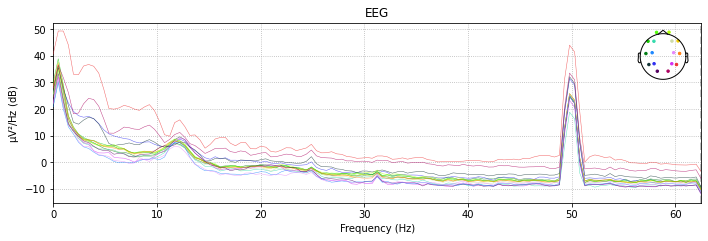

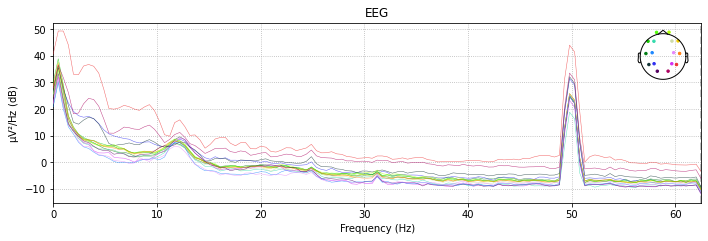

In [71]:
# Plot the exp1
raw.compute_psd().plot()

We can clearly see that our data (all of them) have the powerline noise, we need to filter this out.

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 sec)

Effective window size : 2.048 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


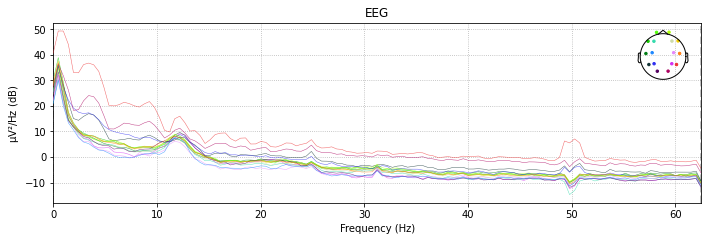

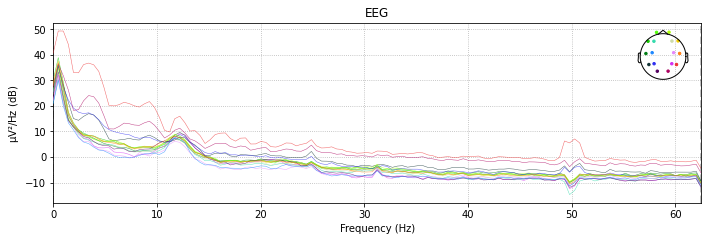

In [72]:
# Chaky code
#raw.notch_filter([25, 50], filter_length='auto', phase='zero') #250/2 based on Nyquist Theorem
raw.notch_filter(50)
#observe that the 50Hz noise is now gone, yay!
raw.compute_psd().plot()

### Band pass filter

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)

Effective window size : 2.048 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


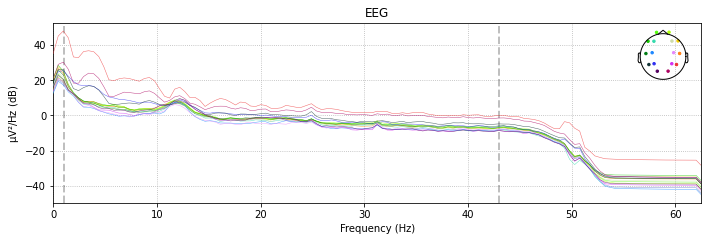

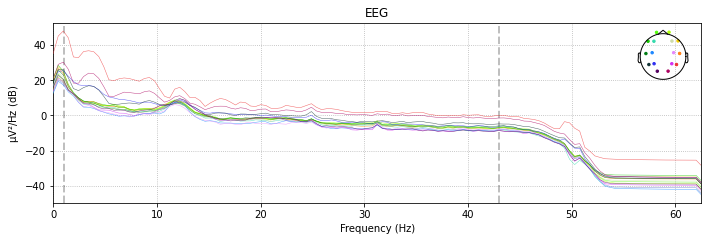

In [73]:
# Slow drift
# Low frequency drifts usually lies below 1Hz and for chornic stress accroding to the paper that we want to reproduct
# it safe to assume that there is no useful data beyond 40hz
raw.filter(1, 43)
raw.compute_psd().plot()

### Dataframe to raw every file

In [74]:
file_name = ['exp1.csv', 'exp2.csv', 'exp3.csv', 'exp4.csv', 'exp5.csv', 'exp6.csv',
'exp7.csv', 'exp8.csv', 'exp9.csv', 'exp10.csv', 'exp11.csv', 'exp12.csv', 'exp13.csv',
'exp14.csv', 'exp15.csv', 'exp16.csv', 'exp17.csv']

In [75]:
main_path = os.getcwd()
raw_eeg = dict()

for index, file in enumerate(file_name):
    converted_signal_path = main_path + '/Converted_signal/' + 'Conv_' + file
    df = pd.read_csv(converted_signal_path)
    raw = df_to_raw(df, convert=False)
    raw_eeg['exp' + str(index)] = raw
    print(f'{file} | time: {len(df)/125}')

Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
exp1.csv | time: 360.0
Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
exp2.csv | time: 360.0
Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
exp3.csv | time: 360.0
Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
exp4.csv | time: 360.0
Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
exp5.csv | time: 360.0
Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
exp6.csv | time: 360.0
Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 4499

exp0
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: Us

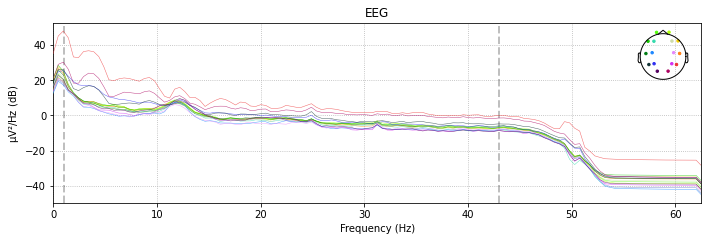

exp1
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 sec)

Effective window size : 2.048 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


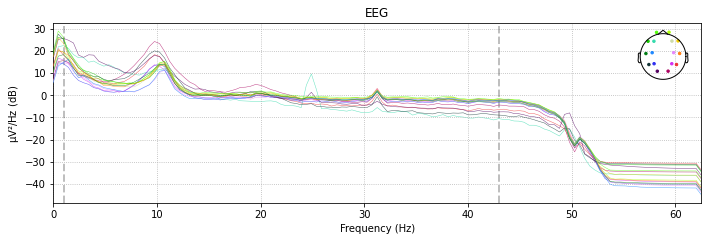

exp2
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: Us

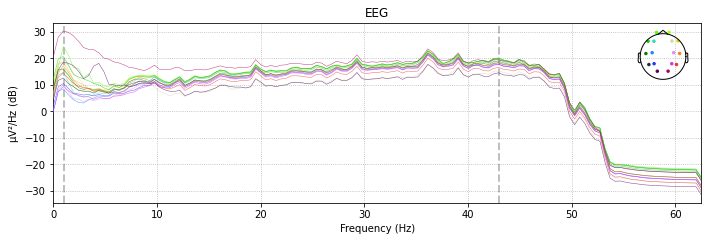

exp3
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: Us

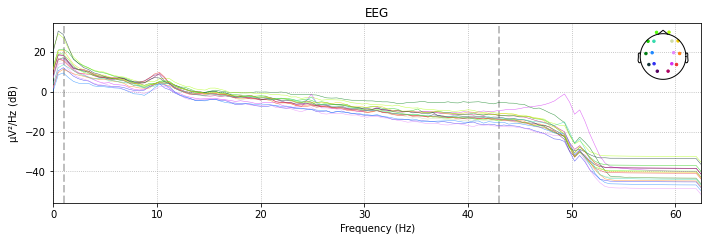

exp4
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: Us

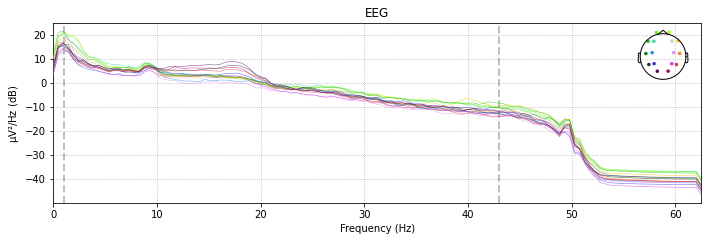

exp5
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: Us

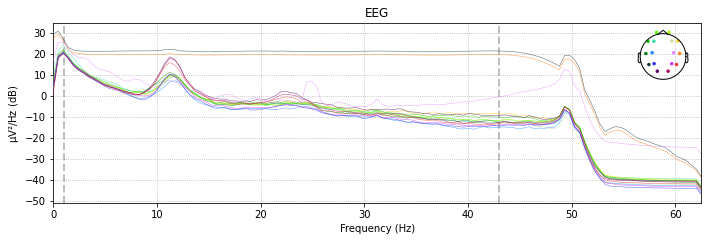

exp6
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: Us

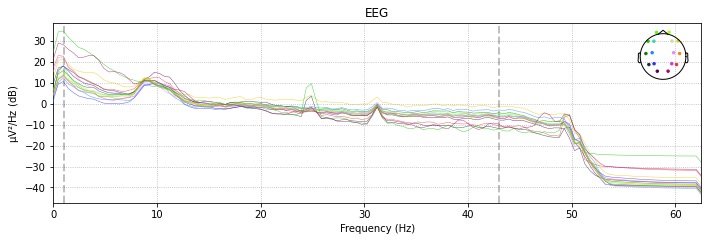

exp7
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: Us

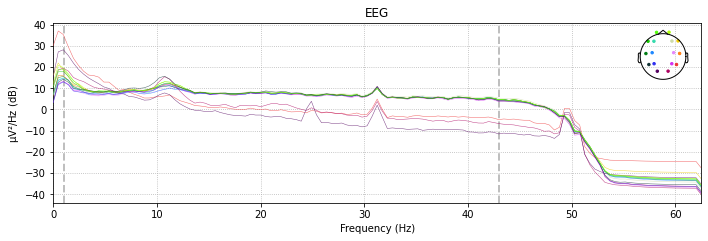

exp8
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: Us

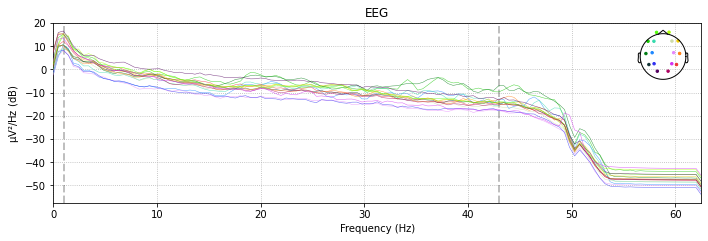

exp9
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: Us

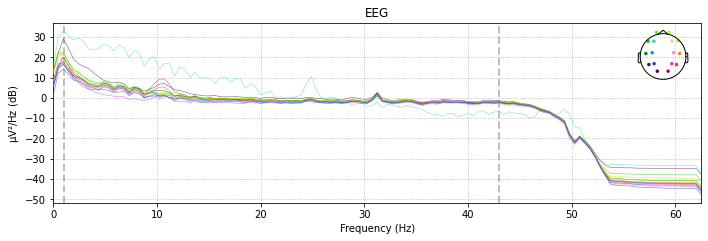

exp10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: Us

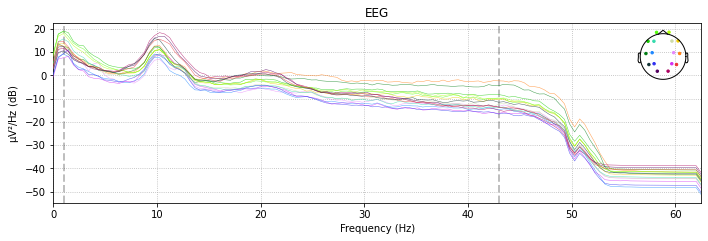

exp11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: Us

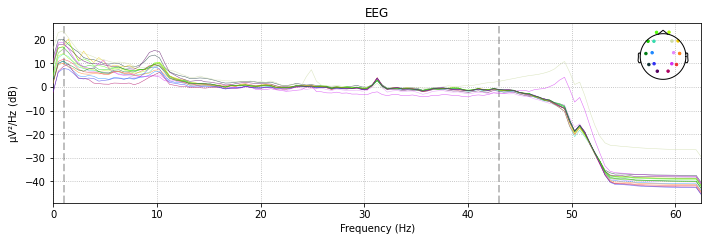

exp12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 sec)

Effective window size : 2.048 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


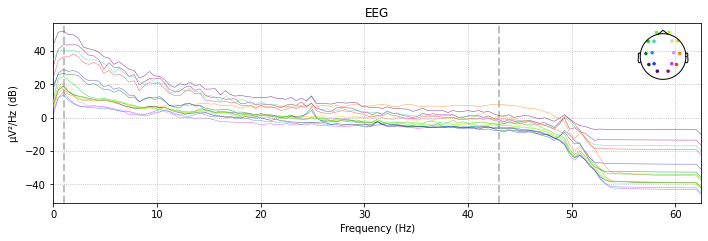

exp13
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: Us

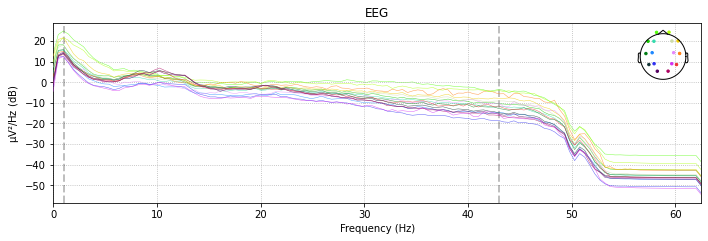

exp14
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 sec)

Effective window size : 2.048 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


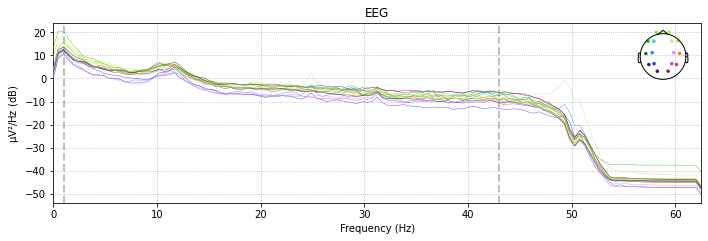

exp15
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 sec)

Effective window size : 2.048 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


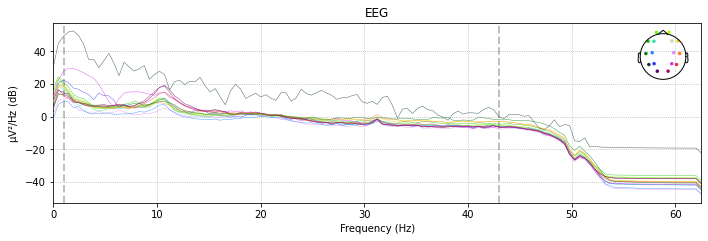

exp16
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 413 samples (3.304 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
c:\Python3.10.4\lib\site-packages\mne\viz\utils.py:137: Us

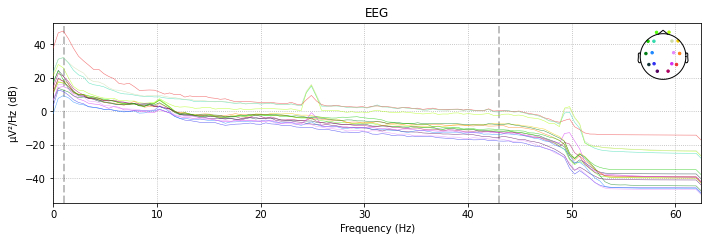

In [76]:
listdata = list()
# Plot function, It does not work when plotting in loop.
for name, info in raw_eeg.items():
   print(name)
   raw = info
   raw.filter(1, 43)
   raw.notch_filter(50)
   #epochs = mne.Epochs(raw, np.array([[125*60*1, 0, 1]]), tmin=0, tmax=30, baseline=(0,30), verbose=False)
   #epochs = mne.Epochs(raw, np.array([[125*360*1, 0, 1]]), tmin=0, tmax=30, baseline=(0,30), verbose=False)
   listdata.append(raw.get_data(start=0))
   #a = epochs.compute_psd().plot(picks=['F3','F4','T3','T4'])
   raw.compute_psd().plot()
   plt.show()
   print('=' * 100)

In [77]:
# Our data is in the shape of (batch, channel, lenght)
X = np.array(listdata)
print(X.shape)

(17, 16, 45000)


In [78]:
# Display the result after some cleaning
test_df = pd.DataFrame(X[0].T, columns=['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2'])
test_df.head()

,Fp1,Fp2,F7,F3,F4,F8,T3,C3,C4,T4,T5,P3,P4,T6,O1,O2
0,4.136909e-18,1.759076e-18,-5.192735e-18,-3.756168e-18,7.719647e-19,-1.604598e-18,3.464365e-19,-5.717472e-19,2.159934e-20,-4.716279e-18,1.019828e-18,-3.107340e-18,1.243444e-18,1.280714e-18,1.046086e-18,1.525930e-18
1,4.253532e-05,4.186614e-05,4.026628e-05,4.636833e-06,3.976324e-05,4.275411e-05,4.113375e-05,4.178330e-05,-5.973358e-06,-2.928267e-06,6.798708e-05,8.765771e-05,-1.595063e-06,3.266236e-04,1.652742e-06,7.463639e-05
2,5.146051e-06,2.151451e-06,6.123164e-06,1.994137e-06,3.613980e-06,1.520363e-06,8.354500e-06,1.700920e-05,1.670333e-08,-5.780924e-06,1.869063e-05,2.120924e-05,-3.867895e-06,4.085811e-05,-4.085485e-06,3.792595e-06
3,1.564818e-05,1.152374e-05,1.622846e-05,3.422735e-06,1.123762e-05,8.480844e-06,1.405801e-05,2.931324e-05,-7.175631e-06,-1.645697e-05,4.272914e-05,5.355558e-05,-8.355082e-06,1.461741e-04,-8.843061e-06,3.749711e-05
4,1.834777e-05,1.302969e-05,1.767284e-05,3.591715e-06,1.384060e-05,1.153370e-05,1.309021e-05,2.639162e-05,-5.531373e-06,-1.662478e-05,4.324093e-05,6.004026e-05,-5.007861e-06,1.745536e-04,-7.210216e-06,4.798237e-05


In [79]:
# Retrieve y
main_path = os.getcwd()
df = pd.read_csv(main_path + '/label_exp.csv')
df['label']

0     1
1     1
2     1
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    1
16    1
Name: label, dtype: int64

In [80]:
y_path = 'label_exp.csv'
df = pd.read_csv(y_path)
y = np.array(df['label'])
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [81]:
# Our data is imbalance
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([10,  7], dtype=int64))

In [82]:
import torch   #general pytorch
import torch.nn as nn  #neural network module
import torch.nn.functional as F  #useful functions like softmax, or relu

#pip install torchvision; conda install torchvision
from torchvision import datasets, transforms  #transforms for image processing
from torch.utils.data import DataLoader, Dataset       #dataloader for preparing batch

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.autograd import Variable

In [83]:
# Create dataset
tensor_X = torch.tensor(X)
tensor_y = torch.tensor(y)
dataset = TensorDataset(tensor_X, tensor_y)

In [84]:
tensor_X.shape

torch.Size([17, 16, 45000])

In [85]:
for x, y in dataset:
    print(x.shape, y.shape)
    break

torch.Size([16, 45000]) torch.Size([])


## 2. EDA - Spectral Analysis

In [86]:
# Meta data
ch_names = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']
ch_types = ['eeg'] * len(ch_names)
sfreq = 125
info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)

# Create epochs
epochs = mne.EpochsArray(tensor_X, info)

# Set headset mapping
epochs.set_montage('standard_1020')
print('------------------')
print(f'{epochs._data.shape=}')
print('------------------')
epochs

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
------------------
epochs._data.shape=(17, 16, 45000)
------------------


Number of events,17
Events,1: 17
Time range,0.000 – 359.992 sec
Baseline,off


In [87]:
# Compute power spectrum density

epoch = epochs.__getitem__(0)
spectrum = epoch.compute_psd(method="welch", n_fft=125) #get Spectrum object from epochs
psds, freqs = spectrum.get_data(return_freqs=True)
print(psds.shape, freqs.shape)

Effective window size : 1.000 (s)
(1, 16, 63) (63,)


In [88]:
# Add log for vissiblity
spectrum = epochs.compute_psd(method='welch', n_fft=125)
psds, freqs = spectrum.get_data(return_freqs=True)
psds = 10 * np.log10(psds)
print(psds.shape, freqs.shape)

Effective window size : 1.000 (s)
(17, 16, 63) (63,)


In [89]:
# 1. First step, find the mean of all channels
psds = psds.mean(axis=1)
psds.shape

(17, 63)

In [90]:
#2. Seperate to the range of bands
# delta 0-3 Hz 
delta = psds[:, :4]
# theta 4-7 Hz
theta = psds[:, 4:8]
# alpha 8-12 Hz
alpha = psds[:, 8:13]
# beta 13-30 Hz
beta = psds[:, 13:31]
# gamma 25-43 Hz
gamma = psds[:, 25:44]
# slow 4-13 Hz
slow = psds[:, 4:14]
# low beta 13-17 Hz
low_beta = psds[:, 13:18]

In [91]:
print(f'delta shape is {delta.shape}')
print(f'theta shape is {theta.shape}')
print(f'alpha shape is {alpha.shape}')
print(f'beta shape is {beta.shape}')
print(f'gamma shape is {gamma.shape}')
print(f'slow shape is {slow.shape}')
print(f'low_beta shape is {low_beta.shape}')

delta shape is (17, 4)
theta shape is (17, 4)
alpha shape is (17, 5)
beta shape is (17, 18)
gamma shape is (17, 19)
slow shape is (17, 10)
low_beta shape is (17, 5)


In [92]:
delta = delta.mean(axis=1).reshape(-1, 1)
theta = theta.mean(axis=1).reshape(-1, 1)
alpha = alpha.mean(axis=1).reshape(-1, 1)
beta = beta.mean(axis=1).reshape(-1, 1)
gamma = gamma.mean(axis=1).reshape(-1, 1)
slow = slow.mean(axis=1).reshape(-1, 1)
low_beta = low_beta.mean(axis=1).reshape(-1, 1)

In [93]:
print(f'delta shape is {delta.shape}')
print(f'theta shape is {theta.shape}')
print(f'alpha shape is {alpha.shape}')
print(f'beta shape is {beta.shape}')
print(f'gamma shape is {gamma.shape}')
print(f'slow shape is {slow.shape}')
print(f'low_beta shape is {low_beta.shape}')

delta shape is (17, 1)
theta shape is (17, 1)
alpha shape is (17, 1)
beta shape is (17, 1)
gamma shape is (17, 1)
slow shape is (17, 1)
low_beta shape is (17, 1)


In [94]:
# Stack them together for ploting
_temp = [delta, theta, alpha, beta, gamma, slow, low_beta]
all_bands = np.hstack(_temp)
all_bands.shape

(17, 7)

In [95]:
# Turn all band into dataframe
df_psd = pd.DataFrame(all_bands, columns= ['delta', 'theta', 'alpha', 'beta', 'gamma', 'slow', 'low_beta'])
df_psd.head()

,delta,theta,alpha,beta,gamma,slow,low_beta
0,-103.855967,-113.474132,-114.980497,-121.669741,-125.276808,-114.309350,-118.880283
1,-106.238841,-113.495096,-109.914336,-120.734402,-122.834981,-112.146374,-119.512280
2,-109.019725,-110.991372,-108.627802,-105.437026,-102.667523,-109.580673,-107.475486
3,-108.867331,-113.982494,-116.637048,-124.604565,-130.265602,-115.976712,-121.469666
4,-108.282874,-114.075776,-115.179914,-120.635756,-127.761296,-114.896325,-116.785763


In [96]:
# epochs.get_data().shape

In [97]:
# epochs.compute_psd().plot(picks=['F3','F4','T3','T4'])

In [98]:
# info.plot_psd()

In [99]:
# Chaky code
def df_to_raw(df, convert=False):
    ch_names = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']
    ch_types = ['eeg'] * len(ch_names)
    df = df.T

    #df[:] *= 1e-6 # mne assume volt data # We already converted in the ETA process

    sampling_rate = 125 #Hz
    info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sampling_rate)
    raw = mne.io.RawArray(df, info)
    raw.set_montage('standard_1020')
    # plotting, is not work
    # raw.compute_psd().plot()
    return raw

In [100]:
# Rename all the files to exp with number 
main_path = os.getcwd()
main_path
all_file = os.listdir(path='./Converted_signal/')
file_name = list()
index_counter = 0
for file in all_file:
    if file[0:8] == 'Conv_exp':
        # old_path = main_path + '/Converted_signal/' + file
        # new_path = main_path + '/Converted_signal/' + 'Conv_exp' + str(index_counter + 1) + '.csv'
        # os.rename(old_path, new_path)
        index_counter += 1
        file_name.append('Conv_exp' + str(index_counter) + '.csv')

In [101]:
file_name

['Conv_exp1.csv',
 'Conv_exp2.csv',
 'Conv_exp3.csv',
 'Conv_exp4.csv',
 'Conv_exp5.csv',
 'Conv_exp6.csv',
 'Conv_exp7.csv',
 'Conv_exp8.csv',
 'Conv_exp9.csv',
 'Conv_exp10.csv',
 'Conv_exp11.csv',
 'Conv_exp12.csv',
 'Conv_exp13.csv',
 'Conv_exp14.csv',
 'Conv_exp15.csv',
 'Conv_exp16.csv',
 'Conv_exp17.csv']

In [102]:
# Put data into mne
main_path = os.getcwd()
eeg = dict()

for index, file in enumerate(file_name):
    clean_signal_path = main_path + '/Converted_signal/' + file
    df = pd.read_csv(clean_signal_path)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    raw = df_to_raw(df)
    eeg['exp' + str(index)] = raw
    print(f'{file} | time: {len(df)/125}')

Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
Conv_exp1.csv | time: 360.0
Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
Conv_exp2.csv | time: 360.0
Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
Conv_exp3.csv | time: 360.0
Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
Conv_exp4.csv | time: 360.0
Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
Conv_exp5.csv | time: 360.0
Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
Conv_exp6.csv | time: 360.0
Creating RawArray with float64 data, n_channels=16, n_time

In [103]:
# Get freqeuency
def get_freq(info):
    raw = info
    power, freq = mne.time_frequency.psd_welch(raw,n_fft=125, verbose=True)
    return freq
    
for name, info in eeg.items():
    freq = get_freq(info)
    print(freq)
    break

Effective window size : 1.000 (s)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62.]


<decorator-gen-201>:4: FutureWarning: NOTE: psd_welch() is a deprecated function. Function ``psd_welch()`` is deprecated; for Raw/Epochs/Evoked instances use ``spectrum = instance.compute_psd(method="welch")`` instead, followed by ``spectrum.get_data(return_freqs=True)``.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [104]:
band_names = np.array(['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma', 'Slow', 'Low_beta'])
filter_list = [[1,3],[4,7],[8,12],[13,30],[30,43], [4,13], [13,17]]
# band_names = np.array(['Delta', 'Theta', 'Alpha', 'Slow', 'Low_beta'])
# filter_list = [[1,3],[4,7],[8,12], [4,13], [13,17]]
bands = []
for filt in filter_list:
    pt = np.argwhere((freq >= filt[0]) & (freq <= filt[1])).reshape(-1)
    bands.append(pt)
bands = np.array(bands)
print(bands)

[array([1, 2, 3], dtype=int64) array([4, 5, 6, 7], dtype=int64)
 array([ 8,  9, 10, 11, 12], dtype=int64)
 array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
        30], dtype=int64)
 array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43],
       dtype=int64)
 array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)
 array([13, 14, 15, 16, 17], dtype=int64)]


C:\Users\Guntsv\AppData\Local\Temp\ipykernel_19744\3271316881.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bands = np.array(bands)


In [105]:
# ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']

In [106]:
#Asymmetry 
features = None
for name, info in eeg.items():
    raw = info
    feature = None
    slow, gamma = None, None
    a_f3, a_f4 = None, None
    a_t7, a_t8 = None, None
    b_f3, b_f4 = None, None
    b_t7, b_t8 = None, None
    #epochs = mne.Epochs(raw, np.array([[125*60*1, 0, 1]]), tmin=0, tmax=30, baseline=(0,30), verbose=False)
    epochs = raw

    print(f'name: {name}')


    for index, band in enumerate(bands):
        
        power,freq = mne.time_frequency.psd_welch(epochs,n_fft=125, verbose=False)
        power = power.squeeze()
        power = 10 * np.log10(power)
        data = power[::,band].mean(axis=1).reshape(1,-1)
        # for asym
        if(band_names[index] == 'Alpha'):
            a_f3 = data[:,raw.ch_names.index('F3')]
            a_f4 = data[:,raw.ch_names.index('F4')]
            # We use t3 as t7 and t4 as t8
            a_t7 = data[:,raw.ch_names.index('T3')]
            a_t8 = data[:,raw.ch_names.index('T4')]
        if(band_names[index] == 'Beta'):
            b_f3 = data[:,raw.ch_names.index('F3')]
            b_f4 = data[:,raw.ch_names.index('F4')]
            # We use t3 as t7 and t4 as t8
            b_t7 = data[:,raw.ch_names.index('T3')]
            b_t8 = data[:,raw.ch_names.index('T4')]

        ####### Mean for visualization #######
        data = data.mean().reshape(1,-1)
        # for relative gamma
        if(band_names[index] == 'Slow'): 
            slow = data
        if(band_names[index] == 'Gamma'): 
            gamma = data

        if(type(feature) == type(None)): 
            print(f'type feature == None band name = {band_names[index]} value = {data}')
            feature = data
        else:
            print(f'band name = {band_names[index]} value = {data}')
            feature = np.concatenate([feature, data], axis=1)
    # print(feature.shape)
    # the eighth feature: relative gamma is slow/gamma
    relative_gamma = slow/gamma
    feature = np.concatenate([feature, relative_gamma], axis=1)

    print(f'relative gamma {relative_gamma}')

    # The asymetry
    alpha_frontal = ((a_f4 - a_f3) / (a_f4 + a_f3)).reshape(1,-1)
    feature = np.concatenate([feature, alpha_frontal], axis=1)

    print(f'alpha_frontal {alpha_frontal}')

    # alpha_temporal
    alpha_temporal = ((a_t8 - a_t7) / (a_t8 + a_t7)).reshape(1,-1)
    feature = np.concatenate([feature, alpha_temporal], axis=1)

    print(f'alpha_temportal {alpha_temporal}')

    # alpha_asymmetry
    alpha_asymmetry = alpha_frontal + alpha_temporal
    feature = np.concatenate([feature, alpha_asymmetry], axis=1)

    print(f'alpha_asymmetry {alpha_asymmetry}')

    # beta_frontal
    beta_frontal = ((b_f4 - b_f3) / (b_f4 + b_f3)).reshape(1,-1)
    feature = np.concatenate([feature, beta_frontal], axis=1)

    print(f'beta_frontal {beta_frontal}')


    # beta_temporal
    beta_temporal = ((b_t8 - b_t7) / (b_t8 + b_t7)).reshape(1,-1)
    feature = np.concatenate([feature, beta_temporal], axis=1)

    print(f'beta_temporal {beta_temporal}')

    # print(slow/gamma)
    # print(feature.shape)
    # print(feature)
    # info['all'] = feature
    #print(feature.shape)
    if(type(features) == type(None)): features = feature
    else: features = np.concatenate([features, feature], axis=0)

print(features.shape)
print('=' * 100)

name: exp0
type feature == None band name = Delta value = [[19.58631245]]
band name = Theta value = [[6.70797007]]
band name = Alpha value = [[5.17490506]]
band name = Beta value = [[-1.48836855]]
band name = Gamma value = [[-5.54098745]]
band name = Slow value = [[5.85557535]]
band name = Low_beta value = [[1.30889182]]
relative gamma [[-1.0567747]]
alpha_frontal [[0.00496784]]
alpha_temportal [[0.11740065]]
alpha_asymmetry [[0.12236849]]
beta_frontal [[-0.06794788]]
beta_temporal [[0.03204845]]
name: exp1
type feature == None band name = Delta value = [[16.72107737]]
band name = Theta value = [[6.70542963]]
band name = Alpha value = [[10.16386373]]
band name = Beta value = [[-0.58936484]]
band name = Gamma value = [[-2.94541623]]
band name = Slow value = [[7.98850877]]
band name = Low_beta value = [[0.66545105]]
relative gamma [[-2.71218332]]
alpha_frontal [[-0.04467632]]
alpha_temportal [[-0.02033242]]
alpha_asymmetry [[-0.06500873]]
beta_frontal [[-0.84119966]]
beta_temporal [[0.08

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GroupKFold,GridSearchCV,cross_val_score 
from sklearn.model_selection import StratifiedShuffleSplit
import torch
import pandas as pd

In [121]:
feature_column = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma', 'Slow', 'Low_beta', 'Relative_gamma', 'Alpha_frontal', 'Alpha_temporal',
'Alpha_asymmetry', 'Beta_Frontal', 'Beta_temporal'] #'label'

In [122]:
df_asy = pd.DataFrame(features, columns=feature_column)
df_asy.head()

,Delta,Theta,Alpha,Beta,Gamma,Slow,Low_beta,Relative_gamma,Alpha_frontal,Alpha_temporal,Alpha_asymmetry,Beta_Frontal,Beta_temporal
0,19.586312,6.707970,5.174905,-1.488369,-5.540987,5.855575,1.308892,-1.056775,0.004968,0.117401,0.122368,-0.067948,0.032048
1,16.721077,6.705430,10.163864,-0.589365,-2.945416,7.988509,0.665451,-2.712183,-0.044676,-0.020332,-0.065009,-0.841200,0.088445
2,13.259280,9.024825,11.389089,14.575796,17.806796,10.434642,12.539912,0.585992,-0.144605,0.015141,-0.129464,-0.195230,0.005924
3,14.045821,6.127062,3.475107,-4.441812,-11.033523,4.134019,-1.333435,-0.374678,0.007900,-0.057762,-0.049863,0.095987,0.576313
4,13.840564,5.948327,4.846019,-0.609308,-9.052312,5.128139,3.237279,-0.566501,-0.128629,-0.025831,-0.154461,1.700731,0.252154


In [123]:
y_path = 'label_exp.csv'
df = pd.read_csv(y_path)
y = np.array(df['label'])
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [124]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df_asy, y, test_size=0.3, random_state=999)
X_train, X_test, y_train, y_test = train_test_split(df_psd, y, test_size=0.3, random_state=999)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11, 7), (6, 7), (11,), (6,))

In [125]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training

In [130]:
param_grid = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = LogisticRegression(max_iter=1000)
grid = GridSearchCV(estimator  = estimator,
                    param_grid = param_grid,
                    cv = cv,  
                    n_jobs  = -1,
                    refit   = True, 
                    scoring = 'accuracy',
                    return_train_score=True)
                    
grid.fit(X_train, y_train)
print('Accuracy GridSearchCV',grid.best_score_)

Accuracy GridSearchCV 0.4666666666666667


### Testing

Accuracy : 0.6666666666666666
classification_report : 
                 precision    recall  f1-score   support

without Stress       0.60      1.00      0.75         3
   with Stress       1.00      0.33      0.50         3

      accuracy                           0.67         6
     macro avg       0.80      0.67      0.62         6
  weighted avg       0.80      0.67      0.62         6

AxesSubplot(0.125,0.125;0.62x0.755)


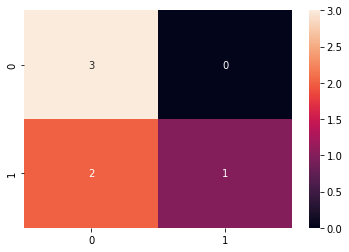

In [131]:
from sklearn.metrics import accuracy_score  
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = grid.predict(X_test)
target_names = ['without Stress', 'with Stress']
acc = accuracy_score(y_test,y_pred)
crp = classification_report(y_test,y_pred, target_names=target_names)
print("Accuracy :",acc)
print("classification_report : \n",crp)
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))
plt.show()

### K-mean Non-used

In [116]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [117]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(features)
df_scale = pd.DataFrame(scale);
df_scale.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.795832,0.452112,0.595861,0.307860,0.243820,0.619005,0.436968,0.663919,0.711108,0.285016,0.603711,0.608629,0.412273
1,0.588335,0.451944,0.920317,0.346595,0.327885,0.773906,0.404712,0.493396,0.672079,0.128404,0.467438,0.437525,0.439125
2,0.337636,0.604934,1.000000,1.000000,1.000000,0.951552,1.000000,0.833140,0.593518,0.168740,0.420562,0.580464,0.399835
3,0.394596,0.413795,0.485314,0.180608,0.065930,0.493980,0.304504,0.734182,0.713413,0.085843,0.478453,0.644904,0.671413
4,0.379732,0.402005,0.574472,0.345735,0.130097,0.566176,0.533642,0.714422,0.606077,0.122151,0.402382,1.000000,0.517072


In [118]:
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(features)
y_predicted

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

<AxesSubplot:>

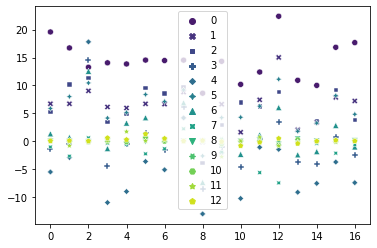

In [119]:
sns.scatterplot(data=features,palette='viridis')